In [1]:

import torch
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


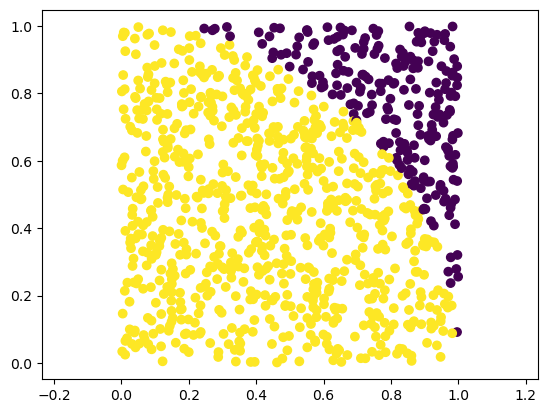

In [2]:
# From previoius segment...
x = torch.rand([1000,2])
x_in_circle = (x**2).sum(1) < 1

def classify(x, weights, bias):
    return (x * weights[None,:]).sum(dim=1) + bias > 0

def accuracy(pred_label):
    return (pred_label==x_in_circle).float().mean()

def show(y):
    scatter(*x.numpy().T, c=y.detach().numpy())
    axis('equal')

def predict(x, weights, bias):
    logit = (x * weights[None,:]).sum(dim=1) + bias
    return 1/(1+(-logit).exp())

def loss(prediction):
    return ( -x_in_circle.float()     * prediction.log() +
             -(1-x_in_circle.float()) * (1-prediction).log() ).mean()

show(x_in_circle)

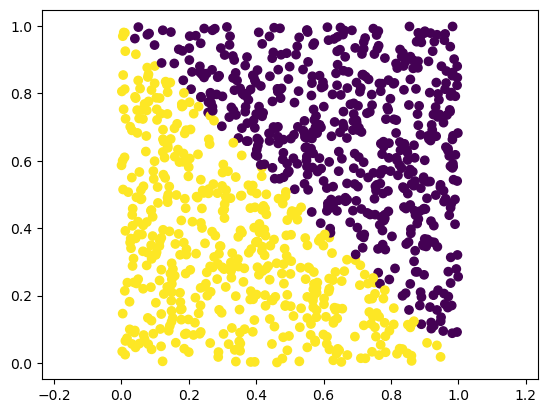

In [3]:
weights = torch.as_tensor([-1,-1], dtype=torch.float)
bias = torch.as_tensor(1.0, dtype=torch.float)

pred_y = classify(x, weights, bias)
p_y = predict(x, weights, bias)

show(pred_y)

In [8]:
import torch.utils.tensorboard as tb
%load_ext tensorboard
import tempfile
log_dir = tempfile.mkdtemp()
%tensorboard --logdir {log_dir} --reload_interval 1 --port=8008

## Use http://localhost:8008/ for access to tensorboard on Chrome

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


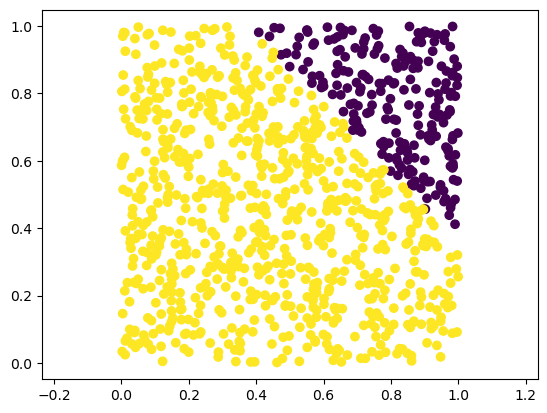

In [9]:

# Setup logging
logger = tb.SummaryWriter(log_dir+'/linear1')

# Setup the model
weights = torch.as_tensor([-1,-1], dtype=torch.float)
bias = torch.as_tensor(1.0, dtype=torch.float)

label = x_in_circle.float()

for iteration in range(5000):

    # Predict the labels and probabilities
    p_y = predict(x, weights, bias)
    pred_y = classify(x, weights, bias)
    
    # Calculate the loss
    l = loss(p_y)
    
    # Logging
    logger.add_scalar("loss", l, global_step=iteration)
    logger.add_scalar("accuracy", accuracy(pred_y), global_step=iteration)
    if iteration % 10 == 0:
        fig = figure()
        show(pred_y)
        logger.add_figure('pred_y', fig, global_step=iteration)
        del fig # Need to delete if using in ipython, will still show up in tensorboard
    
    # Gradient computation
    gradient_l_f = p_y - label.float()
    gradient_w = (gradient_l_f[:,None]*x).mean(0)
    gradient_b = (gradient_l_f).mean(0)
    
    # Gradient update
    weights -= 0.5*gradient_w
    bias    -= 0.5*gradient_b

show(pred_y)